In [1]:
# # !IMPORTANT - to run this notebook download first Houses.csv dataset from https://www.kaggle.com/datasets/dawidcegielski/house-prices-in-poland and put it in same folder as for this notebook
# import libraries
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# import csv into pandas DataFrame
houses = pd.read_csv('data/Houses.csv',encoding = "ISO-8859-1")
houses = houses.sample(frac = 1)
houses.head(50)

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
20526,20526,Centrum,Warszawa,10.0,6956.0,52.231158,21.010063,235000.00,1.0,18.00,2021.0
6466,6466,Wilda Fabryczna,Poznañ,0.0,1623.0,52.386906,16.910832,259900.00,1.0,25.43,1902.0
17373,17373,Nowe Miasto Malta ul. Katowicka,Poznañ,4.0,4638.0,52.397345,16.961939,443362.50,3.0,50.67,2022.0
5834,5834,Grunwald Marcelin,Poznañ,2.0,724.0,52.403023,16.862065,491000.00,3.0,66.42,2023.0
51,51,Wzgórza Krzes³awickie ul.Gustawa Morcinka,Kraków,0.0,26701.0,50.104781,20.036274,270648.00,2.0,37.59,2022.0
4031,4031,Bia³o³êka Kroczewska,Warszawa,1.0,13999.0,52.342371,21.080688,773000.00,3.0,120.00,2022.0
16800,16800,Wola,Warszawa,5.0,14208.0,52.236238,20.954781,440000.00,2.0,38.00,1969.0
12458,12458,Mokotów,Warszawa,8.0,13220.0,52.193987,21.045781,615000.00,3.0,56.20,1980.0
5791,5791,Je¿yce Podolany ul. Druskienicka,Poznañ,3.0,1213.0,52.446986,16.889099,299000.00,2.0,31.83,2020.0
20361,20361,Stare Miasto Winogrady,Poznañ,2.0,3851.0,52.434865,16.938353,359000.00,3.0,47.30,1985.0


In [2]:
# analyze statistic data
print(houses.describe())
print(houses.info())
print(houses.isnull().values.any())

houses

         Unnamed: 0         floor            id      latitude     longitude  \
count  23764.000000  23764.000000  23764.000000  23764.000000  23764.000000   
mean   11881.500000      2.808744  15621.964484     51.374874     19.861773   
std     6860.220235      2.463467   8617.293898      1.099836      1.447186   
min        0.000000      0.000000      1.000000     49.933056      4.204796   
25%     5940.750000      1.000000   8420.750000     50.066489     19.916563   
50%    11881.500000      2.000000  15637.500000     52.193987     19.999330   
75%    17822.250000      4.000000  23111.250000     52.267594     20.996180   
max    23763.000000     10.000000  30308.000000     54.435238     30.319403   

              price         rooms            sq         year  
count  2.376400e+04  23764.000000  2.376400e+04  23764.00000  
mean   6.493536e+05      2.620771  1.027249e+02   2000.55117  
std    5.326970e+05      0.996530  6.533688e+03     48.31402  
min    5.000000e+03      1.000000  8

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
20526,20526,Centrum,Warszawa,10.0,6956.0,52.231158,21.010063,235000.0,1.0,18.00,2021.0
6466,6466,Wilda Fabryczna,Poznañ,0.0,1623.0,52.386906,16.910832,259900.0,1.0,25.43,1902.0
17373,17373,Nowe Miasto Malta ul. Katowicka,Poznañ,4.0,4638.0,52.397345,16.961939,443362.5,3.0,50.67,2022.0
5834,5834,Grunwald Marcelin,Poznañ,2.0,724.0,52.403023,16.862065,491000.0,3.0,66.42,2023.0
51,51,Wzgórza Krzes³awickie ul.Gustawa Morcinka,Kraków,0.0,26701.0,50.104781,20.036274,270648.0,2.0,37.59,2022.0
...,...,...,...,...,...,...,...,...,...,...,...
13667,13667,Ursynów Jana ¯abiñskiego,Warszawa,3.0,12566.0,52.137267,21.057835,569000.0,2.0,53.00,1989.0
55,55,Nowa Huta Czy¿yny,Kraków,6.0,26149.0,50.081635,20.016491,498000.0,2.0,49.08,2019.0
2874,2874,Bronowice,Kraków,8.0,18843.0,50.083325,19.869784,521087.2,2.0,40.52,2021.0
9240,9240,Wilda Dezyderego Ch³apowskiego,Poznañ,3.0,4407.0,52.387578,16.921971,265000.0,2.0,45.35,1989.0


<AxesSubplot:>

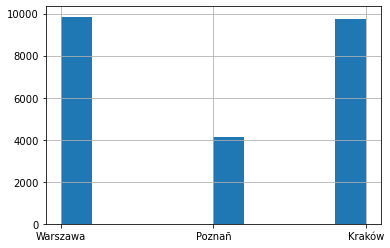

In [3]:
# cities distribution
houses['city'].hist() 

In [4]:
#Use one hot encoding to transform categorical values into boolean columns
cities = pd.get_dummies(houses['city'])
houses = pd.merge(
    left=houses,
    right=cities,
    left_index=True,
    right_index=True,
)
print(houses.head())

       Unnamed: 0                                    address      city  floor  \
20526       20526                                    Centrum  Warszawa   10.0   
6466         6466                            Wilda Fabryczna    Poznañ    0.0   
17373       17373            Nowe Miasto Malta ul. Katowicka    Poznañ    4.0   
5834         5834                          Grunwald Marcelin    Poznañ    2.0   
51             51  Wzgórza Krzes³awickie ul.Gustawa Morcinka    Kraków    0.0   

            id   latitude  longitude     price  rooms     sq    year  Kraków  \
20526   6956.0  52.231158  21.010063  235000.0    1.0  18.00  2021.0       0   
6466    1623.0  52.386906  16.910832  259900.0    1.0  25.43  1902.0       0   
17373   4638.0  52.397345  16.961939  443362.5    3.0  50.67  2022.0       0   
5834     724.0  52.403023  16.862065  491000.0    3.0  66.42  2023.0       0   
51     26701.0  50.104781  20.036274  270648.0    2.0  37.59  2022.0       1   

       Poznañ  Warszawa  
20526 

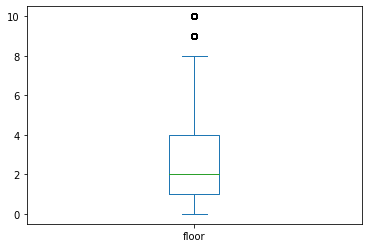

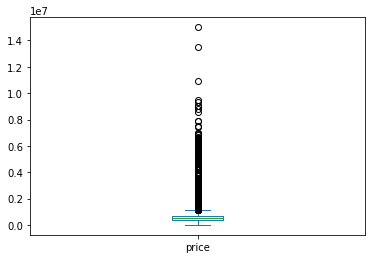

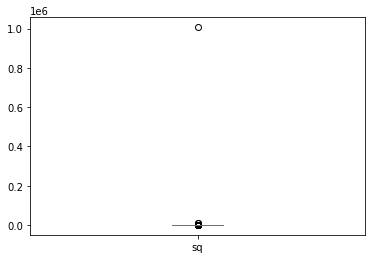

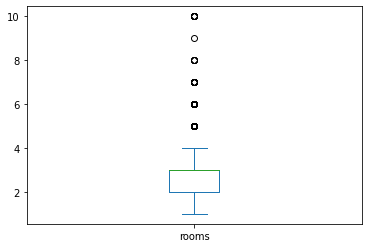

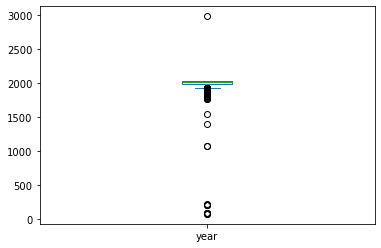

In [5]:
# data distribution on box plots
houses['floor'].plot(kind='box')
plt.show()
houses['price'].plot(kind='box')
plt.show()
houses['sq'].plot(kind='box') 
plt.show()
houses['rooms'].plot(kind='box') 
plt.show()
houses['year'].plot(kind='box')
plt.show()

In [6]:
# Removed not needed columns
del houses['address']
del houses['id']
del houses['Unnamed: 0']
del houses['city']
houses.head()

,floor,latitude,longitude,price,rooms,sq,year,Kraków,Poznañ,Warszawa
20526,10.0,52.231158,21.010063,235000.0,1.0,18.00,2021.0,0,0,1
6466,0.0,52.386906,16.910832,259900.0,1.0,25.43,1902.0,0,1,0
17373,4.0,52.397345,16.961939,443362.5,3.0,50.67,2022.0,0,1,0
5834,2.0,52.403023,16.862065,491000.0,3.0,66.42,2023.0,0,1,0
51,0.0,50.104781,20.036274,270648.0,2.0,37.59,2022.0,1,0,0


In [7]:
#Remove outliers
houses = houses.drop(houses[houses.year < 1800].index)
houses = houses.drop(houses[houses.year > 2022].index)
houses = houses.drop(houses[houses.sq > 500].index)

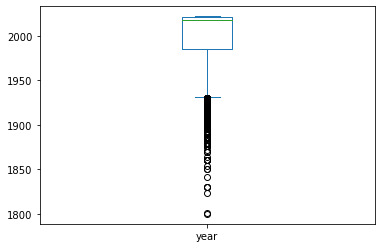

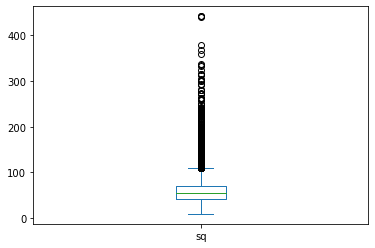

In [8]:
houses['year'].plot(kind='box')
plt.show()
houses['sq'].plot(kind='box')
plt.show()

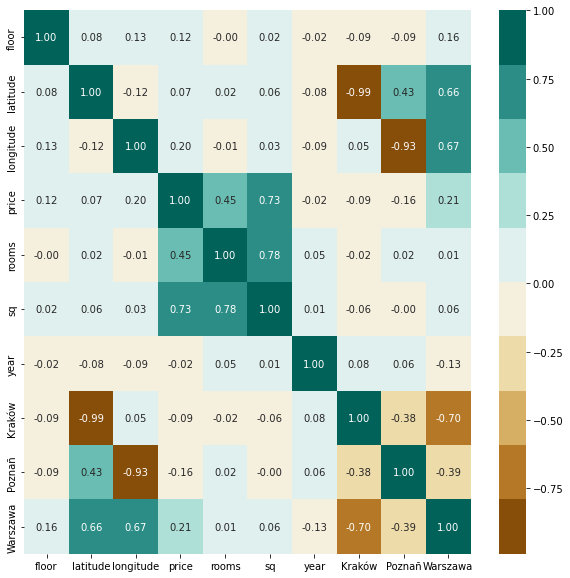

In [9]:
# Display correlation matrix

correlations = houses.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")

plt.show()

In [10]:
# Prepare training set (all data without labels)
X = houses.drop('price', axis=1).to_numpy()
X

array([[10.        , 52.2311577 , 21.0100632 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , 52.3869064 , 16.9108319 , ...,  0.        ,
         1.        ,  0.        ],
       [ 4.        , 52.3973449 , 16.9619394 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 8.        , 50.0833247 , 19.86978365, ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 52.3875784 , 16.9219708 , ...,  0.        ,
         1.        ,  0.        ],
       [10.        , 52.3196649 , 21.0211773 , ...,  0.        ,
         0.        ,  1.        ]])

In [11]:
# Prepare labels for training set
y = houses.loc[:, 'price'].to_numpy()
y

array([235000. , 259900. , 443362.5, ..., 521087.2, 265000. , 475440. ])

In [12]:
# Split data to training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [20]:
# Universal method for training and evaluating different models

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    with open('titanic_classifier.pickle', 'wb') as handle:
        pickle.dump(classifier, handle)
    
    # generate predictions
    predictions = classifier.predict(feature_vector_valid)
    
    # evalueate model
    score_vals = [
        metrics.mean_squared_error(predictions, y_test, squared=False),
        metrics.mean_absolute_error(predictions, y_test)
    ]
    return score_vals

In [21]:
# MODEL 1 - Linear regression
accuracy = train_model(linear_model.LinearRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

# MODEL 2 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

LR:  [338385.6785507428, 160601.01902623716]
random forrest tree [243066.17504349252, 73061.78568023496]


<AxesSubplot:>

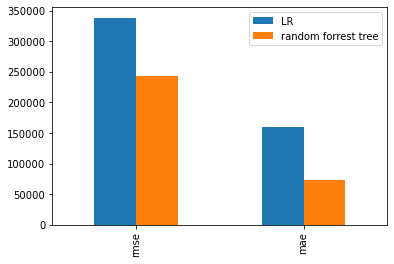

In [22]:
# compare models

df_compare = pd.DataFrame(accuracy_compare, index = ['rmse', 'mae'])
df_compare.plot(kind='bar')

In [23]:
# Test manually prediction
regressor.predict([[2.0, 50.049224, 19.970379, 3.0, 74.05, 2021.0, 1, 0, 0]]) #prawidłowa wartość 749000.0

array([744000.])

In [24]:
# Correction - try adjust model hyperparameters

# MODEL 3 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

random forrest tree [238175.87722700948, 72825.15772778231]
